# Introduction

The Project is to build a model to improve the Zestimate residual error. 

logerror=log(Zestimate)−log(SalePrice) 

“Zestimates” are Zillow's estimated home values. The model is to predict the difference between the Zillow's estimated home value, Zestimate, and the actual sale price. 

## Data

properties_2016.csv: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.

train_2016.csv: all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016. It contains parcel ID ,  transaction date and calculated log error . 

properties_2017.csv: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2017.

train_2017.csv: all the transactions from Jan 1, 2017 to Sep 25, 2017. It can be used as a test dataset.



In [2]:
#import a necessary module

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

# read files

path_properties_2016 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/properties_2016.csv'
df_properties_2016 = pd.read_csv(path_properties_2016, low_memory=False)

path_train_2016 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/train_2016.csv'
df_train_2016 = pd.read_csv(path_train_2016 , parse_dates=["transactiondate"], low_memory=False)

path_properties_2017 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/properties_2017.csv'
df_properties_2017 = pd.read_csv(path_properties_2017, low_memory=False)

path_train_2017 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/train_2017.csv'
df_train_2017 = pd.read_csv(path_train_2017 , parse_dates=["transactiondate"],low_memory=False)

In [3]:
# merge training and properties data for 2016 and 2017

df_train_2016 = pd.merge(df_train_2016, df_properties_2016, how='inner', on='parcelid')
df_test_2017 = pd.merge(df_train_2017, df_properties_2017, how='inner', on='parcelid')

In [28]:
df_train_2016.shape

(90275, 3)

In [15]:
df_test_2016.shape

(90275, 3)

# Data Wrangling

## Data Cleaning

I explored training data. 125 duplicated parcelid for 2016 data and 199 duplicated parcelid for 2017 data were found. However, it meant they were trasacted for more than twice for a year. so it didn't have any problem.

In [31]:
df_train_2016.shape
sum(df_train_2016.duplicated('parcelid'))

125

In [32]:
df_test_2017.shape
sum(df_train_2017.duplicated('parcelid'))

199

## Missing Values

Let's check how many missing value each column has. 
Even though there are many missing values, just leave like this for now as we are not sure which columns we are gonna use



In [35]:
df_2016_missing = df_train_2016.isnull().sum(axis=0)
df_2016_missing.columns = ['missing_values']

df_2016_missing

parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
latitude    

In [36]:
df_2017_missing = df_test_2017.isnull().sum(axis=0)
df_2017_missing

parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid           52606
architecturalstyletypeid        77406
basementsqft                    77563
bathroomcnt                        34
bedroomcnt                         34
buildingclasstypeid             77598
buildingqualitytypeid           27804
calculatedbathnbr                 650
decktypeid                      76999
finishedfloor1squarefeet        71576
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
finishedsquarefeet13            77571
finishedsquarefeet15            74586
finishedsquarefeet50            71576
finishedsquarefeet6             77227
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
hashottuborspa                  76074
heatingorsystemtypeid           28042
latitude    

## Outliers

Let's draw a scatter plot on "logerror", then we can find that there are some outliers at the end of both sides. 

Our task in the project is to find where the zillow algorithm fails. These outliers means where the zillow algorithm fails the most. Thus, I will leave outliers just like that. 


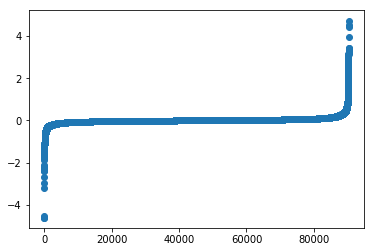

In [12]:
plt.scatter(range(df_train_2016.shape[0]), df_train_2016.sort_values(by='logerror')['logerror'])